In [13]:
try:
    import graphviz as G
except ImportError as e:
    print('ModuleNotFoundError: "graphviz" package not available, install it with "pip install graphviz"')


# boolean variables to denote dense or sparse connections
DENSE = True
SPARSE = False

In [2]:
layers = [3, 4, 4, 10, 10]
connections = [DENSE, DENSE, DENSE, SPARSE] # length = len(layers) - 1
assert len(connections) == (len(layers) - 1), '"connections" array should be 1 less than the #layers'

penwidth = 15
font = "Hilda 10"

In [3]:
dot = G.Digraph(comment='Neural Network', 
                graph_attr={'nodesep':'0.09', 'ranksep':'1', 'bgcolor':'transparent', 'splines':'line', 'rankdir':'LR', 'fontname':font},
                node_attr={'fixedsize':'true', 'label':"", 'style':'filled', 'color':'none', 'fillcolor':'gray', 'shape':'circle', 'penwidth':str(penwidth)},
                edge_attr={'color':'black', 'arrowsize':'.5'})

# Create nodes

In [4]:
for i in range(len(layers)):
    with dot.subgraph(name='cluster_'+str(i)) as c:
        c.attr(color='transparent') # comment this if background is needed
        if i == 0:                 # first layer
            c.attr(label='Input')
        elif i == len(layers)-1:   # last layer
            c.attr(label='Output')
        else:                      # layers in between
            c.attr(label='Hidden')
        for a in range(layers[i]):
            if i == 0 or i == len(layers)-1: # first or last layer
                c.node('l'+str(i)+str(a), fillcolor='black')
            else:
                c.node('l'+str(i)+str(a))

# Create edges

In [5]:
for i in range(len(layers)-1):
    for a in range(layers[i]):
        if connections[i] == DENSE:
            for b in range(layers[i+1]):
                dot.edge('l'+str(i)+str(a), 'l'+str(i+1)+str(b))
        elif connections[i] == SPARSE:
            dot.edge('l'+str(i)+str(a), 'l'+str(i+1)+str(a))

# Render

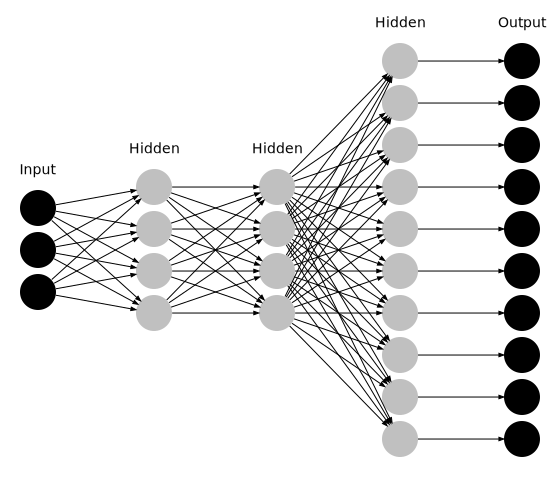

In [6]:
# to just visualise
dot

# Save/Export

In [7]:
# dot.format = 'png' # or PDF, SVG, etc. 

In [8]:
# to save the file, pdf is default
dot.render('./network')

'./network.pdf'